In [14]:
!git clone https://github.com/jsebastianquiroga/tesis_mapeo_distribucion.git

fatal: destination path 'tesis_mapeo_distribucion' already exists and is not an empty directory.


In [ ]:
import os


In [13]:
%run frontera_v3.ipynb

Exception: ignored

In [ ]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [ ]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )

In [ ]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

# LSH

In [ ]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41, method='LSH')

In [ ]:
frontera.frontier()

In [ ]:
frontera.centroids

{'Centroid Group: 1': array([0.28562557, 1.05969625]),
 'Centroid Group: 3': array([-0.28943909,  3.15724892]),
 'Centroid Group: 4': array([1.62286415, 2.1130987 ]),
 'Centroid Group: 6': array([0.65116108, 2.97741681])}

In [ ]:
frontera.plot_frontera_2D(0,1)

# Rob

In [ ]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [ ]:
frontera.frontier()

In [ ]:
frontera.plot_frontera_2D(0,1)

In [ ]:
frontera.plot_Vectors(0,1)

# Leo

In [ ]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=10, N_points_frontera=41, method='prototypes')

In [ ]:
frontera.frontier()

Restricted license - for non-production use only - expires 2024-10-28


In [ ]:
frontera.plot_frontera_2D(0,1)

In [ ]:
prototypes = np.array(list(frontera.objectiveValue.Protypes))

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='LSH')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and LSH')

# Show the plot
plt.show()

# MNIST

In [10]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Normalize the pixel values
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0]).T
# y_test_col = y_test.reshape(1, y_test.shape[0])

#train_data = np.vstack((x_train_flat, y_train_col))
# test_data = np.vstack((x_test_flat, y_test_col))

In [39]:
y_train_col.shape

(60000, 1)

In [42]:
# Create a boolean mask for the labels 0 and 1
mask_train = (y_train == 0) | (y_train == 1)

# Filter the images and labels using the boolean mask
x_train_filtered = x_train_flat[mask_train]
y_train_filtered = y_train[mask_train]

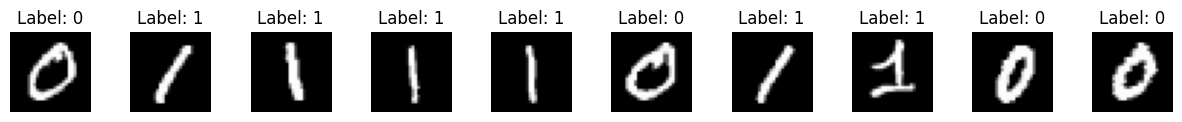

In [43]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    axes = axes.ravel()

    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}", fontsize=12)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

# Display first 10 filtered images from the training set
display_images(x_train_filtered, y_train_filtered)
plt.show()

In [46]:
x_train_filtered.shape

(12665, 784)

In [44]:
y_train_filtered = y_train_filtered.reshape(-1,1)
y_train_filtered

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=uint8)

In [45]:
y_train_filtered.shape

(12665, 1)

In [47]:
x_train_filtered = x_train_filtered[0:600,:]
y_train_filtered = y_train_filtered[0:600]

In [48]:
y_train_filtered.shape

(600, 1)

In [50]:
x_train_filtered.shape

(600, 784)

In [51]:
print(x_train_filtered[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
frontera = Frontera(x_train_filtered,y_train_filtered,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [ ]:
frontera.frontier()

ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 1 is required by check_pairwise_arrays.

In [ ]:
# Normalize the pixel values
x_train_norm = x_train_filtered / 255.0

In [ ]:
x_train_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
frontera = Frontera(x_train_norm,y_train_filtered,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [ ]:
frontera.frontier()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning:

invalid value encountered in divide



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### prototypes

In [ ]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()